# $Unsupervised Learning$

- Learning without labels
- we do not have a target label, or column
- 
- We try to do detective work, by identifying patterns in data


![](https://i.vas3k.ru/7vx.jpg)

![](https://i.vas3k.ru/7w1.jpg)

### Exercise 1:
- create a `pairplot` of the iris dataset and send screenshot in chat
- 

In [60]:
import seaborn as sns

df = sns.load_dataset('iris')

df.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


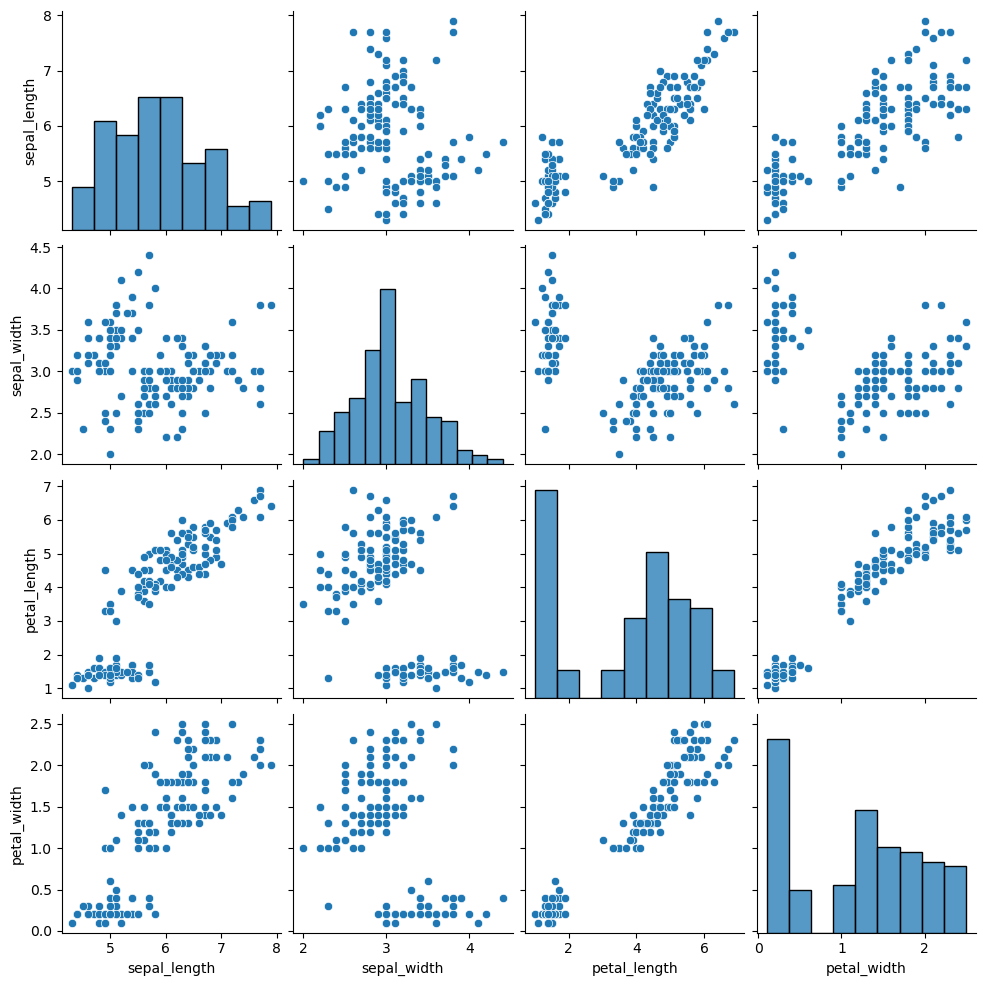

In [61]:
sns.pairplot(df,)

Example:
- I give you a box of legos to sort:
    - sort by color?
    - shape?
    - size?
- 
- 
- it will create groups of legos - we won't know what the names of the colors are
- 

What is it we do using unsupervised learning?

- **Clustering**: Grouping similar data points into clusters (e.g., customer segmentation using K-Means or DBSCAN).
- **Association** Rule Learning: Finding relationships between variables (e.g., market basket analysis with Apriori or FP-Growth)
- **Dimensionality Reduction**: Simplifying datasets by reducing features while retaining essential information (e.g., PCA, t-SNE)

### Clustering:
- grouping data
1. **KMeans**
2. **Hierarchical Clustering**
3. DBSCAN - *Density Based Spatial Clustering of Applications with Noise*

#### K-Means algorithm

![](https://i.vas3k.ru/7w6.jpg)

Algorithm:
1. **Initialization**: Randomly select K points as the initial cluster centroids
2. **Assignment**: Assign each data point to the nearest centroid.
3. **Update**: Recalculate the centroids by averaging the points in  each cluster
4. **Convergence**: Repeat the assignment and update untill centroids stabilize

Random data points --- Naive initialization:
- K random data points are selected

K-Means ++ Initialization:
- Centroids are chosen so they are spread more evenly.
- Idea is to push the centroids as far as possible
- try to take the maximum squared distance


```py
KMeans(init = random / k-means++)

In [62]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

import pandas as pd

In [63]:
data = load_iris()

df_iris = pd.DataFrame(data.data, columns= data.feature_names)
df_iris.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [64]:
# Kmeans

model = KMeans(
    n_clusters= 3,
    init = 'random',
    random_state = 42
)

In [65]:
df_iris['cluster'] = model.fit_predict(df_iris)

c:\Users\devid\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


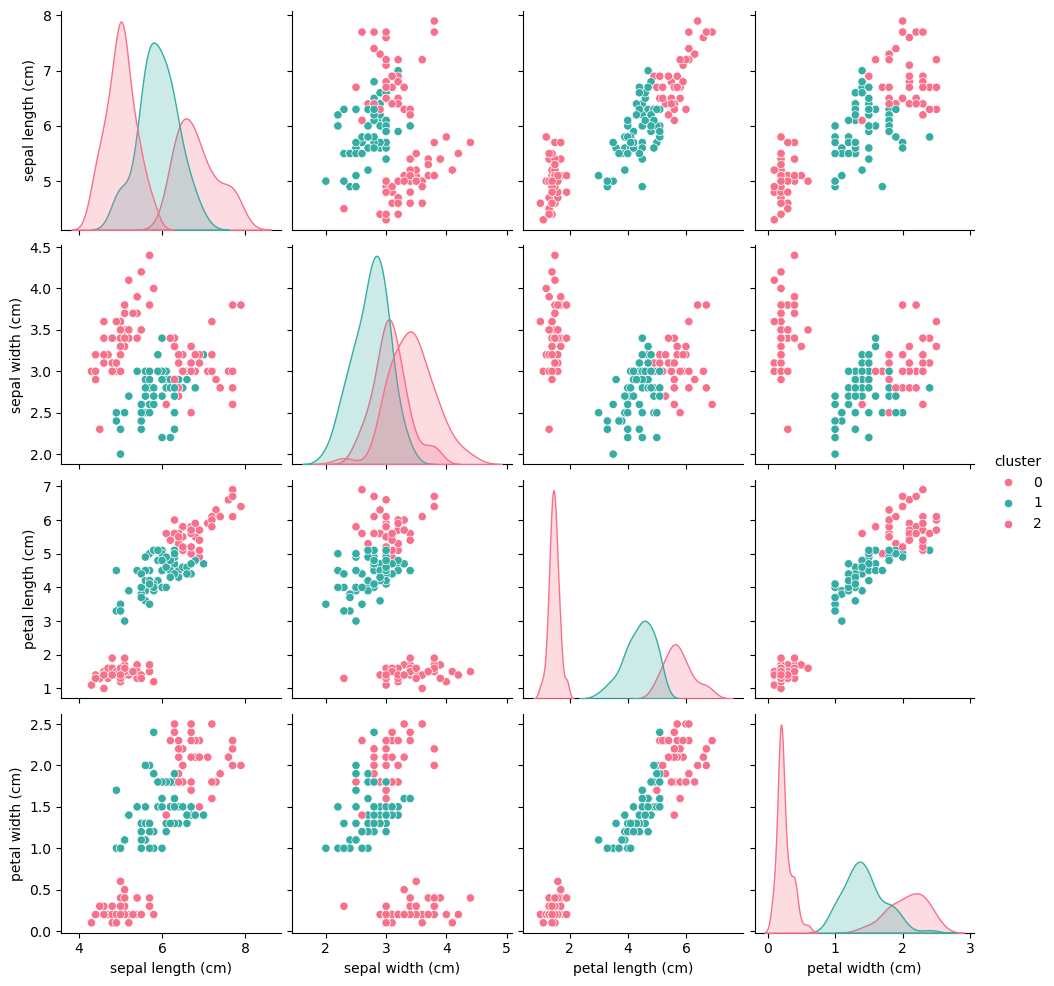

In [66]:


# scatter plot
import seaborn as sns

sns.pairplot(data=df_iris, hue= 'cluster', palette='husl')

In [67]:
iris_target = pd.DataFrame(data.target)
iris_target[0]

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: 0, Length: 150, dtype: int32

In [68]:
# cross tabulations
print(pd.crosstab(iris_target[0], df_iris.cluster))

cluster   0   1   2
0                  
0        50   0   0
1         0  48   2
2         0  14  36


### Exercise 
- cluster the data for penguins

In [69]:
df_penguins = sns.load_dataset('penguins') # but this df has labels too
df_penguins.head(2)

# remove the label, use the unlabelled dataset
# you can cluster the dataset and check wheher our algorithm actually found out the three catagories

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female


### Hierarchical Clustering
- 
- agglomerative : 
    - bottom up approach
    - each data point is treated as cluster
    - you merge the closest pairs of clusters together
    - until only one remains

- divisive
    - top down approach
    - you start off with a cluster of clusters
    - split it into smaller ones
    - untill you get to data points
    

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering, DBSCAN

from scipy.cluster.hierarchy import dendrogram, linkage

In [71]:
iris = load_iris()


X = iris.data

y = iris.target

In [72]:
# perform the hierarchical clutering

linked = linkage(X, method = 'ward')


In [ ]:

# Reduce down the number of labels in dendogram
iris.target_names[y]

# --------------- List Comprehension ----------------------------------------------------
reduced_labels = [iris.target_names[label] if index % 5 == 0 else '' for index, label in enumerate(y)] # index an iterable --- y --- 0 --> 0
# reduced_labels

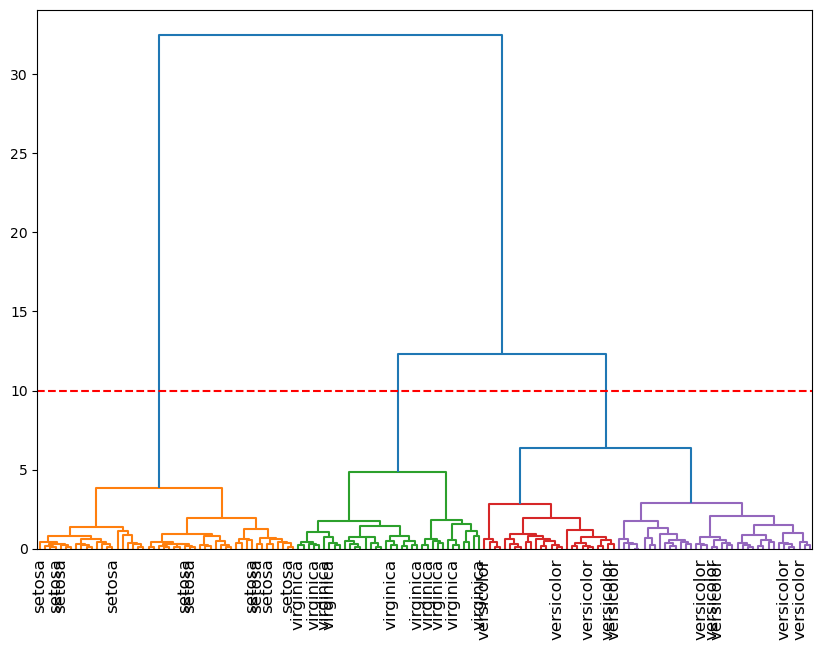

In [74]:
plt.figure(figsize=(10,7))

dendrogram(linked, labels= reduced_labels,  leaf_rotation= 90, leaf_font_size= 12, color_threshold= 6  )

plt.axhline(y = 10, color = "r", linestyle = '--')
plt.show()

In [75]:
# Agglomerative clustering to get clusters

hc_model = AgglomerativeClustering(n_clusters= 3, linkage= 'ward')

hc_cluster = hc_model.fit_predict(X)
hc_cluster

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int64)

In [76]:
predictions = iris.target_names[hc_cluster]

**DBSCAN**
- eps : float, default=0.5
    - The maximum distance between two samples for one to be considered as in the neighborhood of the other. This is not a maximum bound on the distances of points within a cluster. This is the most important DBSCAN parameter to choose appropriately for your data set and distance function.
- min_samples= 5
    - The number of samples (or total weight) in a neighborhood for a point to be considered as a core point.

In [77]:
# DBSCAN 


dbscan_model = DBSCAN(eps = 0.5, min_samples= 5)

dbs_cluster = dbscan_model.fit_predict(X)
dbs_cluster

# -1 will be points treated as NOISE

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)